In [7]:
import matplotlib.pyplot as plt
from surprise import SVD, Dataset, SVDpp, NMF
from surprise.model_selection import cross_validate

## Homework 7

Take the MovieLens dataset and build a matrix factorization model. In  surprise, it is referred to as SVD. Find the best parameters using cross-validation, and also experiment with other calculation algorithms (SVD++, NMF). Choose the one that proves to be optimal.

1. Load the MovieLens 100K dataset

In [8]:
data = Dataset.load_builtin('ml-100k')

2. Define a function to evaluate a model using cross-validation

In [9]:
def evaluate_model(model, data):
    results = cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    return results

3. Create list of models to evaluate

In [10]:
models = [SVD(), SVDpp(), NMF()]
model_names = ['SVD', 'SVDpp', 'NMF']
rmse_values = [] ## To store mean RMSE values for each algorithm

4. Create loop through the models and evaluate them

In [11]:
for model in models:
    results = evaluate_model(model, data)

    # Calculate and store the mean RMSE for the current model
    mean_rmse = sum(results['test_rmse']) / 5
    rmse_values.append(mean_rmse)

    # Print mean RMSE and MAE for the current model
    print("\nMean RMSE:", sum(results['test_rmse']) / 5)
    print("Mean MAE:", sum(results['test_mae']) / 5)
    print("\n")

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9375  0.9298  0.9437  0.9375  0.9341  0.9365  0.0046  
MAE (testset)     0.7392  0.7315  0.7419  0.7395  0.7375  0.7379  0.0035  
Fit time          0.38    0.37    0.38    0.44    0.45    0.40    0.03    
Test time         0.04    0.07    0.04    0.07    0.04    0.05    0.02    

Mean RMSE: 0.936519716923088
Mean MAE: 0.7379431967667329


Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9238  0.9145  0.9233  0.9274  0.9050  0.9188  0.0081  
MAE (testset)     0.7246  0.7171  0.7251  0.7267  0.7097  0.7206  0.0064  
Fit time          6.28    6.25    6.28    6.28    6.34    6.28    0.03    
Test time         1.20    1.24    1.28    1.25    1.22    1.24    0.03    

Mean RMSE: 0.9187970407018129
Mean MAE: 0.7206324003868056


Evaluating RMSE, 

5. Create a bar plot to compare RMSE values across different algorithms

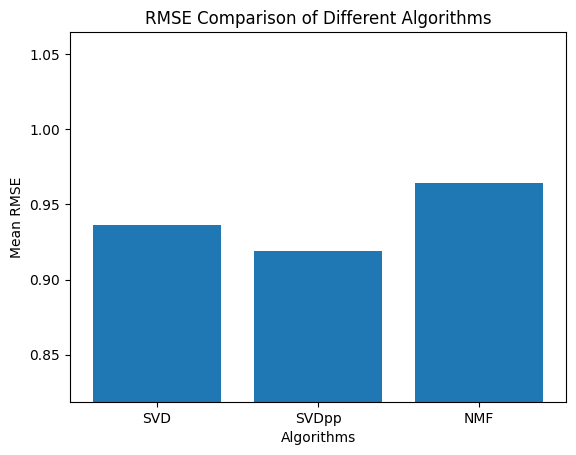

In [12]:
plt.bar(model_names, rmse_values)
plt.xlabel('Algorithms')
plt.ylabel('Mean RMSE')
plt.title('RMSE Comparison of Different Algorithms')
plt.ylim(min(rmse_values) - 0.1, max(rmse_values) + 0.1)
plt.show()